# **Assignment: CIFAR-100 Image Classification**

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [1]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


## Pre-processing the data:

In [2]:
# Normalize the pixel values using your variable names
cifar100_train_images = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images = cifar100_test_images.astype('float32') / 255.0

# One-Hot Encode the labels for 100 classes
num_classes_c100 = 100
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=num_classes_c100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=num_classes_c100)

# Verify the new shapes of the labels
print("Training labels shape (One-Hot):", cifar100_train_labels_one_hot.shape)
print("Testing labels shape (One-Hot):", cifar100_test_labels_one_hot.shape)

Training labels shape (One-Hot): (50000, 100)
Testing labels shape (One-Hot): (10000, 100)


## ANN MODEL

In [3]:
INPUT_SHAPE_C100 = (32, 32, 3)
NUM_CLASSES_C100 = 100

cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=INPUT_SHAPE_C100),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(NUM_CLASSES_C100, activation='softmax')
])

cifar100_ann_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

print("\nANN Model Summary:")
cifar100_ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



ANN Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

###INSIGHTS:

This ANN model is designed for the CIFAR-100 dataset, evidenced by its output layer of 100 neurons. It begins by flattening the 32x32x3 input images into a vector of 3,072 features. With over 832,000 trainable parameters, the majority are concentrated in the first dense layer.

## BASIC CNN MODEL

In [4]:
cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE_C100),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(NUM_CLASSES_C100, activation='softmax')
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

print("\nBasic CNN Model Summary:")
cifar100_basic_cnn_model.summary()



Basic CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

### INSIGHTS:
This basic CNN is designed for 32x32 color images, confirmed by the output of the first `Conv2D` layer (`30, 30, 32`). After two blocks of convolution and pooling, the feature maps are flattened into a 2,304-element vector. The model's final dense layer has 100 outputs, making it suitable for CIFAR-100.

## DEEPER CNN MODEL

In [5]:
cifar100_deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # CRITICAL FIX: The final layer must have 100 neurons for the 100 classes of CIFAR-100
    keras.layers.Dense(100, activation='softmax')
])

# Re-compile the model
cifar100_deeper_cnn_model.compile(optimizer='adam',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

print("\nDeeper CNN Model Summary:")
cifar100_deeper_cnn_model.summary()


Deeper CNN Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 840,068 (3.20 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 1,408 (5.50 KB)

### INSIGHTS:
This deeper CNN model summary reveals a more complex architecture suitable for the CIFAR-100 dataset. It uses repeated blocks of convolution, batch normalization, and pooling to progressively extract features while reducing dimensionality. With over **840,000 parameters**, a significant number of which are in the final dense layers, it's designed to learn intricate patterns from the `32x32` color images.

#Training Models:
## ANN TRAINING

In [6]:
# Patience is increased to 10 for this more complex dataset.
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("\n Training ANN Model ")

checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)
history_ann_c100 = cifar100_ann_model.fit(
    cifar100_train_images, cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_ann]
)
print("ANN model training finished.")


 Training ANN Model 
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0477 - loss: 4.3355 - val_accuracy: 0.1056 - val_loss: 3.8826
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1215 - loss: 3.7706 - val_accuracy: 0.1447 - val_loss: 3.7103
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1481 - loss: 3.6223 - val_accuracy: 0.1604 - val_loss: 3.6084
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1680 - loss: 3.5093 - val_accuracy: 0.1747 - val_loss: 3.5231
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1781 - loss: 3.4483 - val_accuracy: 0.1757 - val_loss: 3.5213
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1909 - loss: 3.3851 - val_accuracy: 0.1838 - val_loss: 3.4791
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1957 - loss: 3.3525 - val_accuracy: 0.1889 - val_loss: 3.4354
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2044 - loss: 3.2

## BASIC CNN TRAINING

In [7]:
print("\nTraining Basic CNN Model")

checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    'best_cifar100_basic_cnn_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)
history_basic_cnn_c100 = cifar100_basic_cnn_model.fit(
    cifar100_train_images, cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")



Training Basic CNN Model
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0594 - loss: 4.2323 - val_accuracy: 0.1694 - val_loss: 3.5097
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1972 - loss: 3.3699 - val_accuracy: 0.2323 - val_loss: 3.1764
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2600 - loss: 3.0184 - val_accuracy: 0.2737 - val_loss: 2.9594
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2999 - loss: 2.8067 - val_accuracy: 0.2988 - val_loss: 2.8463
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3364 - loss: 2.6440 - val_accuracy: 0.3118 - val_loss: 2.7615
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3536 - loss: 2.5369 - val_accuracy: 0.3289 - val_loss: 2.6889
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3755 - loss: 2.4509 - val_accuracy: 0.3486 - val_loss: 2.5951
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3883 - loss

## DEEPER CNN TRAINING

In [8]:
print("\nTraining Deeper CNN Model")

checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    'best_cifar100_deeper_cnn_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)
history_deeper_cnn_c100 = cifar100_deeper_cnn_model.fit(
    cifar100_train_images, cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")


Training Deeper CNN Model
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.0603 - loss: 4.6126 - val_accuracy: 0.2106 - val_loss: 3.2831
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1852 - loss: 3.4067 - val_accuracy: 0.2611 - val_loss: 2.9906
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2664 - loss: 2.9239 - val_accuracy: 0.3381 - val_loss: 2.5487
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3233 - loss: 2.6361 - val_accuracy: 0.3993 - val_loss: 2.2904
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3528 - loss: 2.4730 - val_accuracy: 0.4374 - val_loss: 2.1115
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3867 - loss: 2.3160 - val_accuracy: 0.4355 - val_loss: 2.1165
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4141 - loss: 2.2030 - val_accuracy: 0.4714 - val_loss: 1.9421
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.

## Final Performance Evaluation on the Test Set

In [10]:
import pandas as pd

print("\nEvaluating Final Model Performance")

# Load the best weights saved by ModelCheckpoint during training
print("Loading best model weights...")
cifar100_ann_model.load_weights('best_cifar100_ann_model.weights.h5')
cifar100_basic_cnn_model.load_weights('best_cifar100_basic_cnn_model.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model.weights.h5')

# Evaluate each model on the test set using the correct variable names
print("Evaluating models on the test set...")
loss_ann, acc_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_basic_cnn, acc_basic_cnn = cifar100_basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_deeper_cnn, acc_deeper_cnn = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

# Create a summary DataFrame to compare performance
performance_data_c100 = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [acc_ann, acc_basic_cnn, acc_deeper_cnn]
}
performance_df_c100 = pd.DataFrame(performance_data_c100)

print("\n--- Final Performance on CIFAR-100 Test Set ---")
print(performance_df_c100.round(4))


Evaluating Final Model Performance
Loading best model weights...
Evaluating models on the test set...

--- Final Performance on CIFAR-100 Test Set ---
        Model  Test Loss  Test Accuracy
0         ANN     3.3019         0.2253
1   Basic CNN     2.5435         0.3634
2  Deeper CNN     1.3914         0.6115


### INSIGHTS:
The evaluation results clearly demonstrate that the **Deeper CNN** is the superior model for the CIFAR-100 dataset, achieving a **test accuracy of 61.15% and the lowest loss of 1.3914.** This performance significantly surpasses the **Basic CNN (36.34% accuracy) and the ANN (22.53% accuracy)**. This progression highlights a strong correlation between performance and architectural complexity; the added layers and regularization in the Deeper CNN were crucial for learning the intricate features of this challenging dataset, proving its effectiveness over simpler models.

## Visualizing Training History

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("\nPlotting Training and Validation History")

models_history = {
    "ANN": ("cyan", history_ann_c100),
    "Basic CNN": ("magenta", history_basic_cnn_c100),
    "Deeper CNN": ("yellow", history_deeper_cnn_c100)
}

fig = make_subplots(rows=1, cols=2, subplot_titles=('Validation Accuracy', 'Validation Loss'))

for name, (color, history) in models_history.items():
    # Accuracy Plot
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=f'{name} Val Acc', line=dict(color=color)), row=1, col=1)

    # Loss Plot
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=f'{name} Val Loss', line=dict(color=color)), row=1, col=2)

fig.update_layout(
    title_text="CIFAR-100 Model Performance Comparison",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()


Plotting Training and Validation History


### INSIGHTS:
The training history plots clearly illustrate the **Deeper CNN's** (yellow line) superior learning ability, as its validation accuracy rapidly climbs to approximately 60% while its loss consistently decreases to the lowest level. In contrast, the **Basic CNN** (magenta) shows limited improvement before plateauing below 40% accuracy, and the **ANN** (cyan) fails to learn effectively, flatlining near 20%. The shorter training runs for the simpler models indicate that `EarlyStopping` intervened, confirming that only the Deeper CNN's architecture was robust enough to continue learning from this complex dataset.

## Visualizing Confusion Matrices


Generating and Plotting Confusion Matrices
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


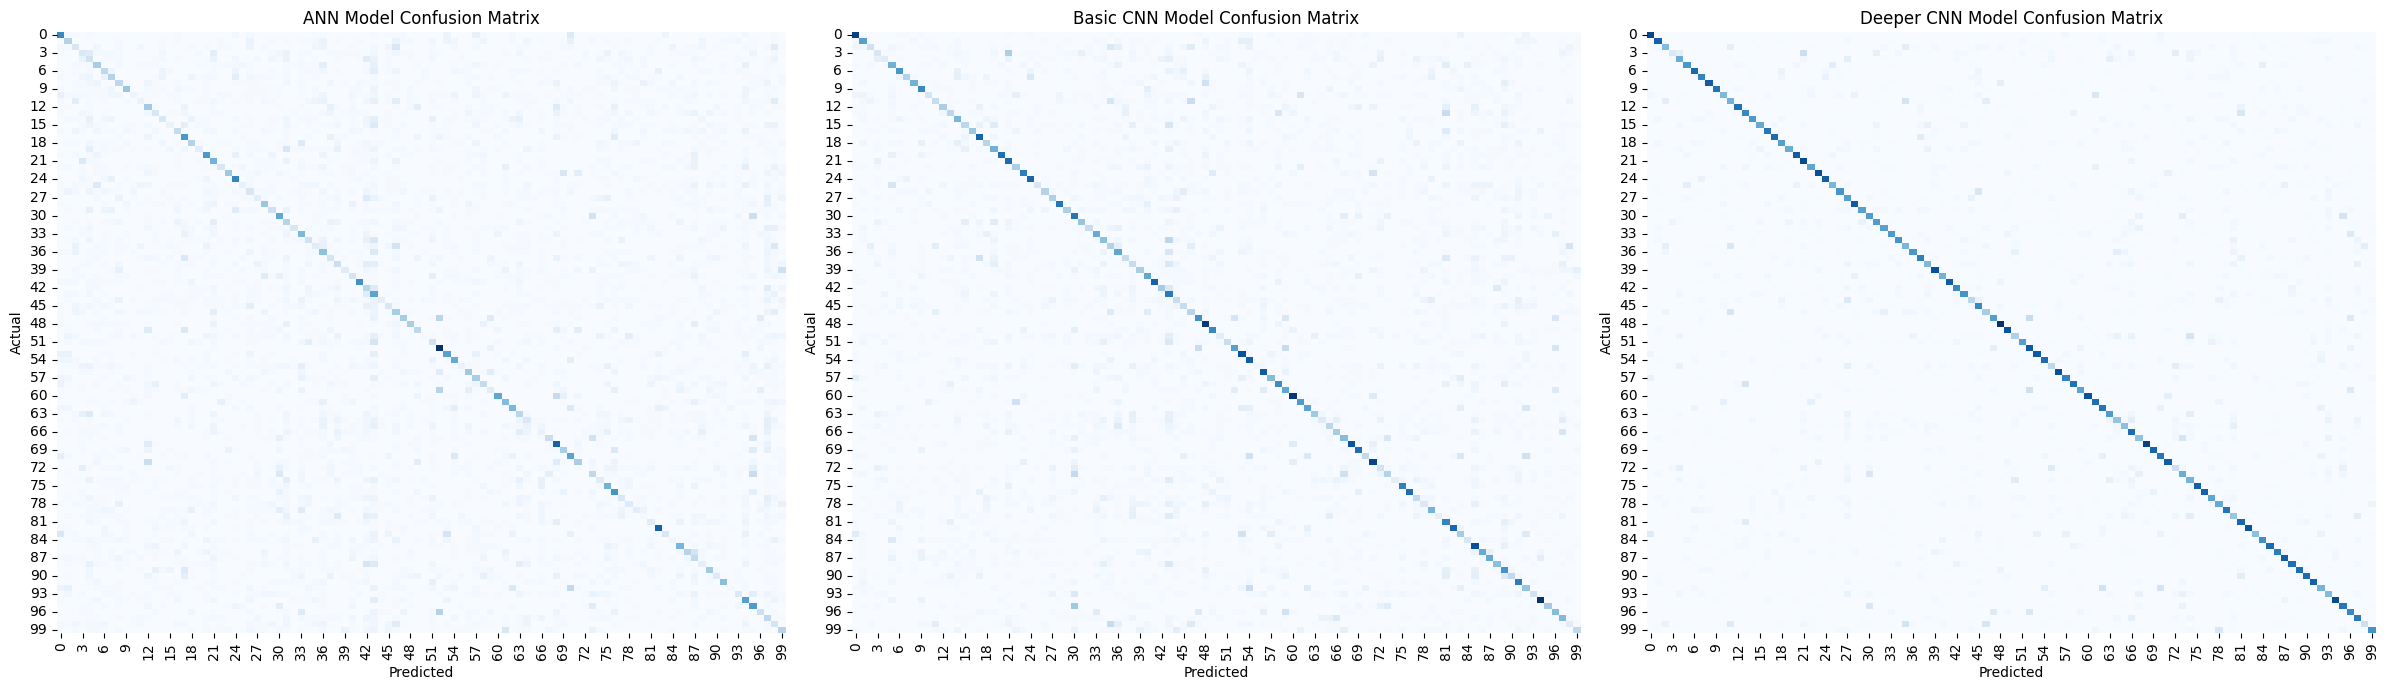

In [13]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


print("\nGenerating and Plotting Confusion Matrices")

# Make predictions with each model using the correct test images variable
pred_ann = cifar100_ann_model.predict(cifar100_test_images)
pred_basic_cnn = cifar100_basic_cnn_model.predict(cifar100_test_images)
pred_deeper_cnn = cifar100_deeper_cnn_model.predict(cifar100_test_images)

# Convert predictions and true labels from one-hot to integer format
y_pred_ann = np.argmax(pred_ann, axis=1)
y_pred_basic_cnn = np.argmax(pred_basic_cnn, axis=1)
y_pred_deeper_cnn = np.argmax(pred_deeper_cnn, axis=1)
y_true = np.argmax(cifar100_test_labels_one_hot, axis=1) # Use correct true labels variable

# Generate confusion matrices
cm_ann = confusion_matrix(y_true, y_pred_ann)
cm_basic_cnn = confusion_matrix(y_true, y_pred_basic_cnn)
cm_deeper_cnn = confusion_matrix(y_true, y_pred_deeper_cnn)

# Plot the confusion matrices
plt.style.use('default')
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

sns.heatmap(cm_ann, cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("ANN Model Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic_cnn, cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("Basic CNN Model Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper_cnn, cmap="Blues", ax=axes[2], cbar=False)
axes[2].set_title("Deeper CNN Model Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

###INSIGHTS:
The confusion matrices visually confirm the performance hierarchy established by the accuracy metrics. The **Deeper CNN** (right) displays a sharp, bright diagonal line, indicating it correctly classifies most images with minimal confusion between the 100 classes. In contrast, the **ANN** (left) has a faint diagonal and widespread off-diagonal noise, showing it frequently misclassifies images. The **Basic CNN** (center) performs better than the ANN but is clearly less precise than the Deeper CNN. This vividly illustrates how increasing architectural complexity improved the model's ability to discriminate between classes.

## Prediction Analysis with the Best Model (Deeper CNN)


Analyzing Predictions from the Deeper CNN Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Found 6115 correct predictions.
Found 3885 incorrect predictions.


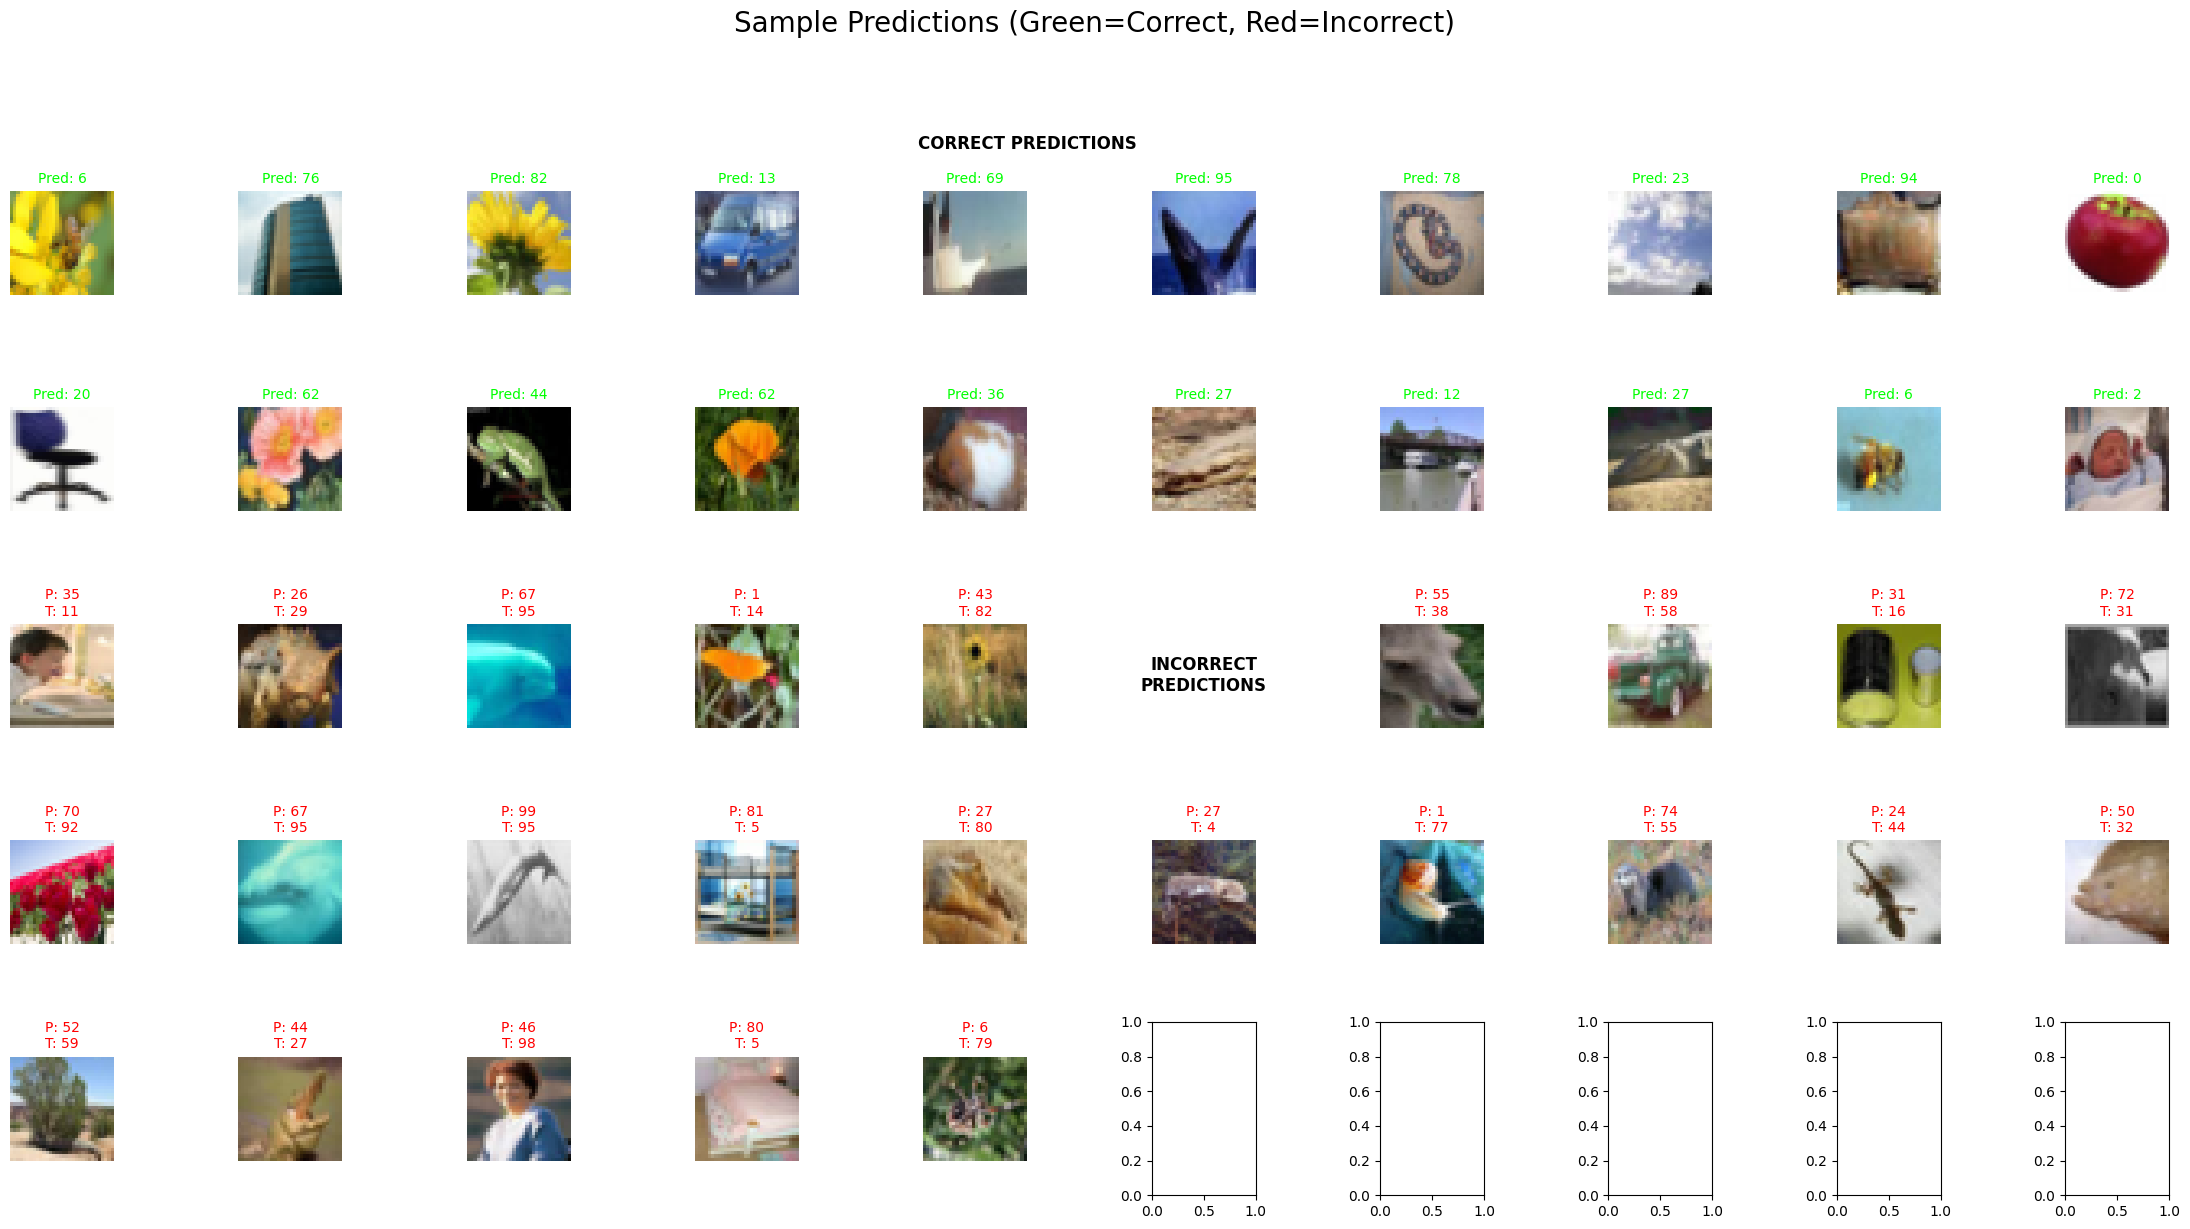

In [14]:
print("\nAnalyzing Predictions from the Deeper CNN Model")

# If you haven't run it in the previous step, make predictions and get integer labels
# y_pred_deeper_cnn was already calculated in the confusion matrix step, but we include it here for completeness.
predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)
y_pred_deeper_cnn = np.argmax(predictions, axis=1)
y_true_c100 = cifar100_test_labels.flatten() # Use the original integer labels

# Find the indices of correctly and incorrectly classified images
correct_indices = np.where(y_pred_deeper_cnn == y_true_c100)[0]
incorrect_indices = np.where(y_pred_deeper_cnn != y_true_c100)[0]

print(f"\nFound {len(correct_indices)} correct predictions.")
print(f"Found {len(incorrect_indices)} incorrect predictions.")

# Create a figure to display a sample of predictions
fig, axes = plt.subplots(5, 10, figsize=(22, 12))
fig.suptitle("Sample Predictions (Green=Correct, Red=Incorrect)", fontsize=20, y=1.02)


# --- Display 25 Correct Predictions ---
for i, idx in enumerate(np.random.choice(correct_indices, 25, replace=False)):
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.imshow(cifar100_test_images[idx])
    ax.set_title(f"Pred: {y_pred_deeper_cnn[idx]}", color="lime", fontsize=10)
    ax.axis("off")


# --- Display 25 Incorrect Predictions ---
for i, idx in enumerate(np.random.choice(incorrect_indices, 25, replace=False)):
    row = (i // 10) + 2  # Start incorrect predictions from the 3rd row
    col = i % 10
    if row == 2 and col == 5: # Create a small gap for a text label
        ax = axes[row, col]
        ax.text(0.5, 0.5, 'INCORRECT\nPREDICTIONS', horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
        ax.axis("off")
        continue

    ax = axes[row, col]
    ax.imshow(cifar100_test_images[idx])
    ax.set_title(f"P: {y_pred_deeper_cnn[idx]}\nT: {y_true_c100[idx]}", color="red", fontsize=10)
    ax.axis("off")

# Add a label for the correct predictions block
axes[0, 4].text(1.0, 1.4, 'CORRECT PREDICTIONS', transform=axes[0, 4].transAxes,
                fontsize=12, weight='bold', ha='center')


plt.tight_layout()
plt.show()

### INSIGHTS:
This prediction analysis provides a visual confirmation of the Deeper CNN's **61.15% accuracy**, having correctly identified **6,115 of the 10,000 test images**. The grid of *Correct Predictions* (labeled in green) showcases the model's capability to learn diverse features across various classes like animals, vehicles, and plants. Conversely, the samples of *Incorrect Predictions* (labeled in red) are crucial for qualitative assessment, revealing specific instances where the model struggles. This visual feedback helps diagnose the model's weaknesses and identify which classes are most commonly confused with others.

# **Assignment Conclusion**


1. Loaded and preprocessed the complex CIFAR-100 dataset.

2. Adapted three different neural network architectures (ANN, Basic CNN, Deeper CNN) to work with the new data.

3. Trained all three models using best practices like early stopping and model checkpointing.

4. Evaluated and compared their performance both quantitatively (with a summary table) and visually (with training plots and confusion matrices).

5. Analyzed the predictions of your best model to gain a deeper understanding of its behavior.